## <center> <font color='blue'> <b> A more challenging sequence </b> </font> </center>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

The sequence will be: $$ x(t) = \sin(\omega t^2) $$


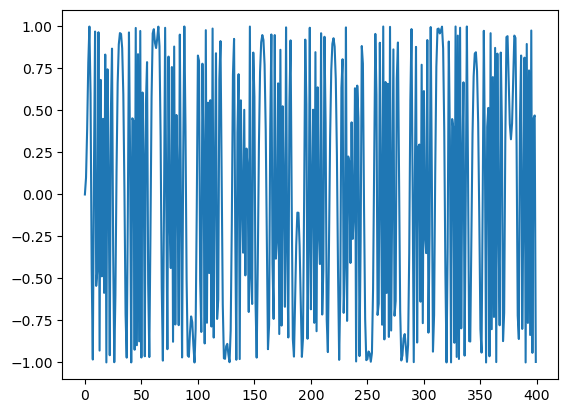

In [4]:
# make the original data
series = np.sin((0.1 * np.arange(400)**2))

#plot
plt.plot(series)
plt.show()


$$ x(t) = \sin(\omega t \cdot t) $$


In [5]:
# build the dataset
# use the past 10 values to predict the next one
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)


In [15]:
# train test split
X_train = X[:-N//2]
y_train = Y[:-N//2]
X_val = X[-N//2:]
y_val = Y[-N//2:]

### Autorregresive Model

In [16]:
i = Input(shape=(T, ))
x = Dense(1)(i)
model = Model(i, x)

model.compile(
    loss='mse', 
    optimizer=Adam(learning_rate=0.01))

r = model.fit(
    X_train, y_train, 
    epochs=80, 
    verbose=0,
    validation_data=(X_val, y_val))


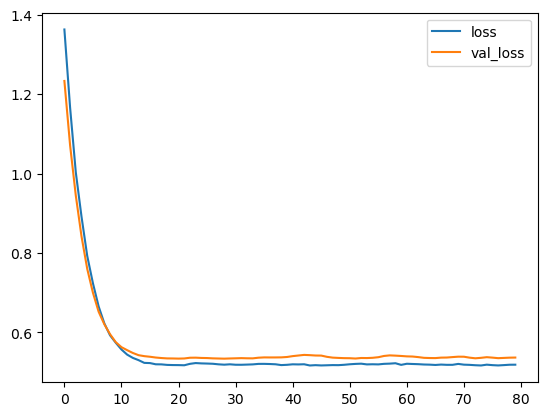

In [17]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

For 1 step forecast we can use model.predict: 

In [18]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

13/13 [==============================] - 0s 1ms/step
(390, 1)


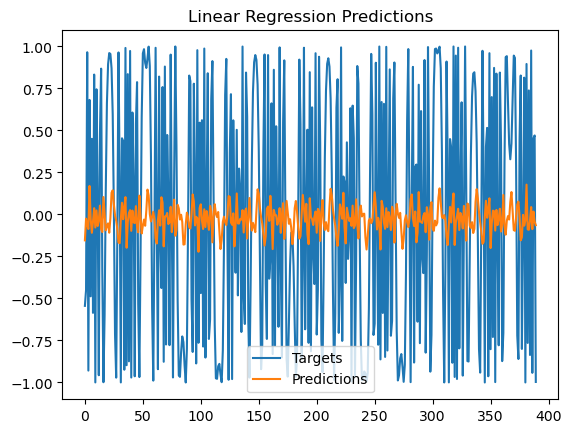

In [19]:
plt.plot(Y, label='Targets')
plt.plot(predictions, label='Predictions')
plt.title('Linear Regression Predictions')
plt.legend()


We see that the result is bad; it didn't even learn the range of values correctly.

Now, let's do it only with the validation targets, and the other way to forecast to practice:

In [22]:
# one step forecast using true targets

val_pred = []
i = 0

while(len(val_pred) < len(y_val)):
    p = model.predict(X[i].reshape(1, -1), verbose=0)[0,0]
    i += 1
    
    val_pred.append(p)


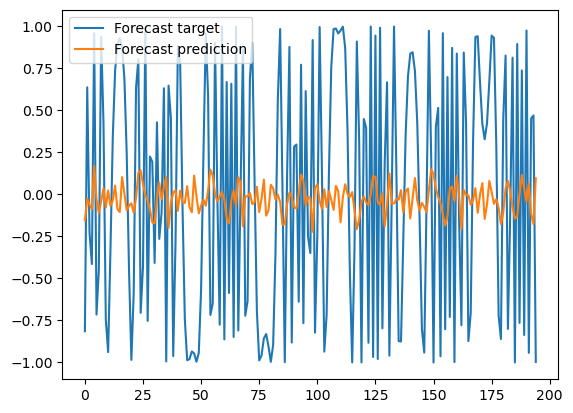

In [23]:
plt.plot(y_val, label='Forecast target')
plt.plot(val_pred, label='Forecast prediction')
plt.legend()

Now, let's do multi-step forecast:

In [26]:
# Multi-step forecast
val_pred = []

last_x = X_val[0]

while (len(val_pred) < len(y_val)):
    p = model.predict(last_x.reshape(1, -1), verbose=0)[0, 0]
    val_pred.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p


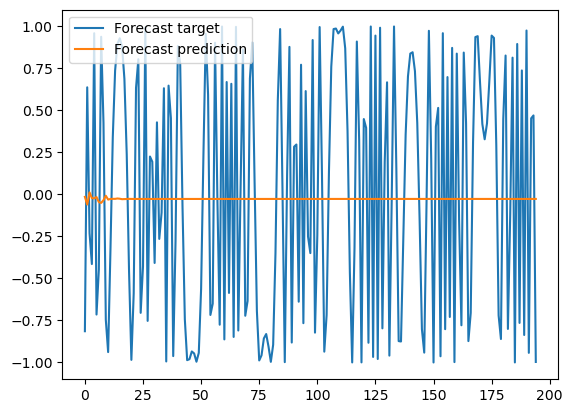

In [27]:
plt.plot(y_val, label='Forecast target')
plt.plot(val_pred, label='Forecast prediction')
plt.legend()

We can see our model is pretty bad.

### Simple RNN

Let's try with a simple RNN.

In [40]:
X = X.reshape(-1, T, 1) # make it N x T x 

# make the model
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss='mse', 
    optimizer=Adam(learning_rate=0.01))

r = model.fit(
    X_train, y_train, 
    batch_size = 32,
    epochs=80, 
    verbose=0,
    validation_data=(X_val, y_val))

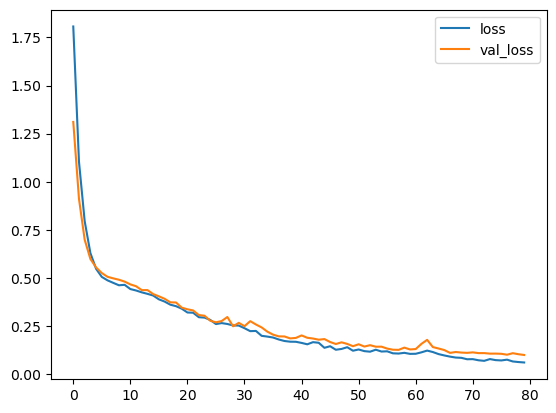

In [41]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [49]:
outputs = model.predict(X_val.reshape(-1, T, 1))
print(outputs.shape)
predictions = outputs[:, 0]

7/7 [==============================] - 0s 2ms/step
(195, 1)


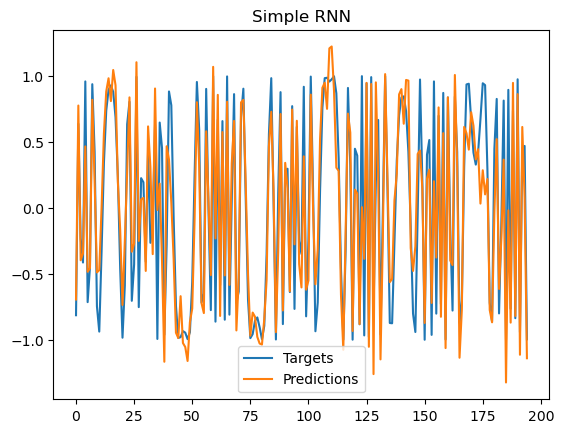

In [50]:
plt.plot(y_val, label='Targets')
plt.plot(predictions, label='Predictions')
plt.title('Simple RNN')
plt.legend()

We can see is much better than the AR model.

In [44]:
# Multi-step forecast
val_pred = []

last_x = X_val[0]

while (len(val_pred) < len(y_val)):
    p = model.predict(last_x.reshape(1, T, 1), verbose=0)[0, 0]
    val_pred.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

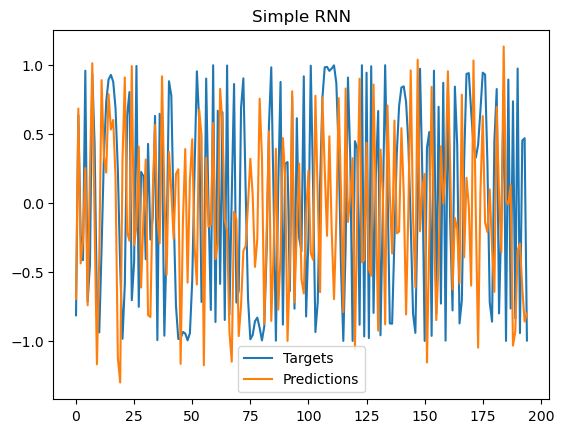

In [45]:
plt.plot(y_val, label='Targets')
plt.plot(val_pred, label='Predictions')
plt.title('Simple RNN')
plt.legend()

Much better than the AR model.

The takeaway is that for simple problems, a simple model may work better than an RNN. However, for more complex problems, RNNs or other specialized architectures are likely to yield better results.